In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [4]:
# Example 5: Average Temperature of St. Louis dataset

# Read in temp dataset
temp = pd.read_csv(r'C:\Users\ungdu\Downloads\lab6_datamining_20521214\df_temp.csv', index_col=0, parse_dates=True)
print(temp.head())

            Value
Date             
1938-04-01   56.5
1938-05-01   64.7
1938-06-01   73.5
1938-07-01   80.4
1938-08-01   81.3


In [5]:
# Estimate Moving Average

# Fit an MA(1) model to the first simulated data
mod = ARIMA(temp, order=(0,0,1))  # order is reversed for MA compared to AR, MA(1)
res = mod.fit()

c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [6]:
# Print out summary information on the fit
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  970
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3721.217
Date:                Tue, 04 Jun 2024   AIC                           7448.434
Time:                        01:34:41   BIC                           7463.066
Sample:                    04-01-1938   HQIC                          7454.004
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.4312      0.664     85.024      0.000      55.130      57.732
ma.L1          0.7946      0.021     37.677      0.000       0.753       0.836
sigma2       125.6755      7.665     16.397      0.0

In [7]:
# Print out the estimate for the coefficients
print(res.params)

const      56.431224
ma.L1       0.794585
sigma2    125.675485
dtype: float64


In [8]:
# Forecast Moving Average Model

# Forecast the first MA(1) model
mod = ARIMA(temp, order=(0,0,1))
res = mod.fit()

c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [9]:
# Start the forecast 10 data points before the end of the point series at,
# and end the forecast 10 data points after the end of the series at point
forecast = res.get_forecast(steps=10)
forecast_index = pd.date_range(start='2025', periods=10, freq='M')

C:\Users\ungdu\AppData\Local\Temp\ipykernel_27812\3923295939.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2025', periods=10, freq='M')


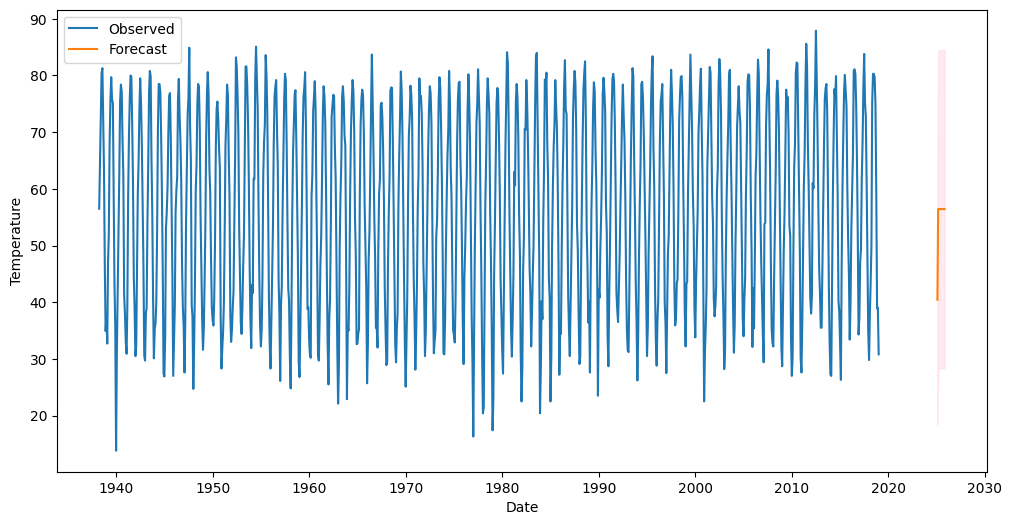

In [10]:
# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(temp.index, temp, label='Observed')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()